In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-05-15 09:18:37.245907: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 09:18:37.302675: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 09:18:38.265295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("AIDS_Classification.csv")
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [3]:
y = data["infected"].to_numpy()

In [4]:
X = data.iloc[:, :-1].to_numpy()

In [5]:
y

array([0, 1, 0, ..., 0, 1, 0])

In [6]:
X

array([[9.480e+02, 2.000e+00, 4.800e+01, ..., 4.770e+02, 5.660e+02,
        3.240e+02],
       [1.002e+03, 3.000e+00, 6.100e+01, ..., 2.180e+02, 3.920e+02,
        5.640e+02],
       [9.610e+02, 3.000e+00, 4.500e+01, ..., 2.740e+02, 2.063e+03,
        1.893e+03],
       ...,
       [1.104e+03, 2.000e+00, 5.300e+01, ..., 3.640e+02, 1.391e+03,
        1.041e+03],
       [4.650e+02, 0.000e+00, 1.400e+01, ..., 1.690e+02, 9.990e+02,
        1.838e+03],
       [1.045e+03, 3.000e+00, 4.500e+01, ..., 9.300e+02, 8.850e+02,
        5.260e+02]])

In [7]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.1)

In [8]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
X_valid = scaler.transform(X_valid)

In [13]:
len(X_train), len(X_test)

(1925, 107)

In [14]:
len(Y_train), len(Y_test)

(1925, 107)

### Train the model

In [15]:
N, D = X_train.shape

In [16]:
K = 1

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

2024-05-15 09:18:40.301134: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 09:18:40.301476: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=35)

Epoch 1/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3970 - loss: 1.1947 - val_accuracy: 0.4579 - val_loss: 1.0014
Epoch 2/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 1.0006 - val_accuracy: 0.4953 - val_loss: 0.8867
Epoch 3/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 0.9368 - val_accuracy: 0.5234 - val_loss: 0.7898
Epoch 4/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4818 - loss: 0.8367 - val_accuracy: 0.5701 - val_loss: 0.7121
Epoch 5/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5315 - loss: 0.7478 - val_accuracy: 0.6449 - val_loss: 0.6521
Epoch 6/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 0.6944 - val_accuracy: 0.6916 - val_loss: 0.6064
Epoch 7/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 0.6378 - val_accuracy: 0.7383 - val_loss: 0.5725
Epoch 8/35
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.5912 - val_accuracy: 0.7570 - val_loss:

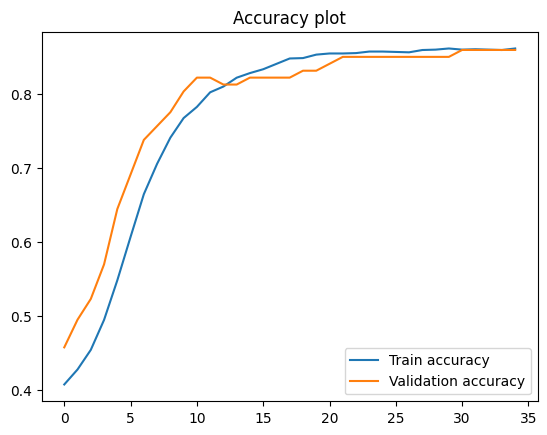

In [30]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

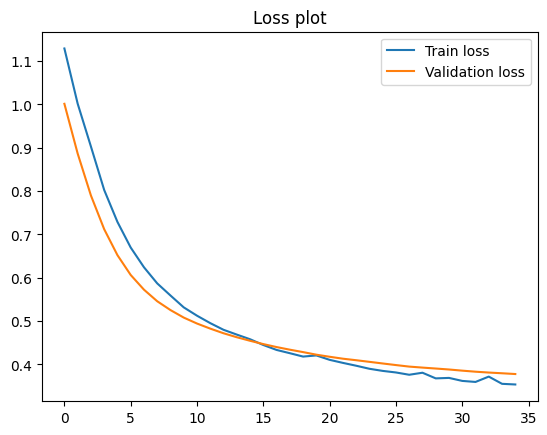

In [21]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [22]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 86.18%


In [23]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.35367608070373535%


In [24]:
evaluation = model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.3856 


In [25]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 81.31%


In [26]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.35169991850852966


In [27]:
Y_pred = np.round(model.predict(X_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [28]:
conf_m = confusion_matrix(Y_pred, Y_test.reshape(-1, 1))

AttributeError: 'function' object has no attribute 'shape'

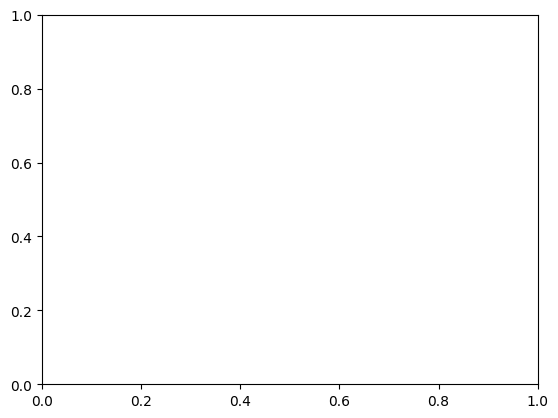

In [29]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot();